In [147]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [148]:
df = pd.read_csv("./knndata.csv")

In [149]:
df.head()

,A,B,C,D,E,F,TARGET CLASS
0,10.967008,2.324145,0.567946,3.777319,0.780862,0.879422,1
1,7.627583,2.007443,0.535342,4.128224,0.924109,0.621552,0
2,8.656318,2.402985,0.921990,4.277975,1.526629,0.957877,0
3,14.810453,2.773453,0.653046,4.128122,1.142504,1.522692,1
4,15.353890,1.899499,0.627280,3.344880,1.232537,1.463812,1


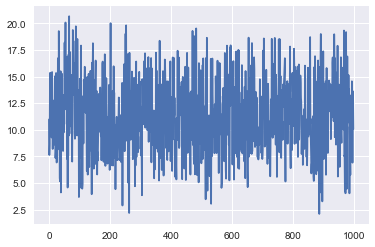

In [150]:
plt.plot(df['A'])

In [151]:
df.describe()

,A,B,C,D,E,F,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,11.396178,2.228605,0.834127,3.410497,1.032336,1.158251,0.50000
std,3.475623,0.514171,0.291554,1.148225,0.243413,0.293738,0.50025
min,2.092940,0.882796,0.170924,0.225133,0.315307,0.365157,0.00000
25%,8.908292,1.884141,0.615451,2.575049,0.870855,0.934340,0.00000
50%,11.285701,2.236972,0.813264,3.384173,1.035824,1.165556,0.50000
75%,13.959536,2.615809,1.028340,4.171584,1.198270,1.383173,1.00000
max,20.661350,3.667513,1.722725,8.174420,1.650050,1.885690,1.00000


Normalizing


In [152]:
x=np.array([2,5,6,1,2,4,6,7,9,12,5,2,7,15,23,54,18,39],float)
y=x/np.max(x)

In [153]:
y

array([ 0.03703704,  0.09259259,  0.11111111,  0.01851852,  0.03703704,
        0.07407407,  0.11111111,  0.12962963,  0.16666667,  0.22222222,
        0.09259259,  0.03703704,  0.12962963,  0.27777778,  0.42592593,
        1.        ,  0.33333333,  0.72222222])

In [154]:
import sklearn.preprocessing as skp

In [155]:
y1=skp.normalize(x[None,:])

In [156]:
y1

array([[ 0.02584359,  0.06460897,  0.07753077,  0.01292179,  0.02584359,
         0.05168718,  0.07753077,  0.09045256,  0.11629615,  0.15506154,
         0.06460897,  0.02584359,  0.09045256,  0.19382692,  0.29720128,
         0.69777692,  0.23259231,  0.50395   ]])

standard scalar

In [157]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('TARGET CLASS',axis=1))
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))
df1 = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df1.head()

,A,B,C,D,E,F
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-0.949719
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.828051
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.682494
3,0.982841,1.060193,-0.621399,0.625299,0.452820,1.241325
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,1.040772


In [158]:
df1.describe()

,A,B,C,D,E,F
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,-7.140954e-16,-2.148282e-16,3.308465e-17,1.938449e-16,-7.520651e-16,3.030909e-17
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-2.678050e+00,-2.618747e+00,-2.275858e+00,-2.775551e+00,-2.947206e+00,-2.701361e+00
25%,-7.161683e-01,-6.702761e-01,-7.504105e-01,-7.279635e-01,-6.637361e-01,-7.626629e-01
50%,-3.180217e-02,1.628137e-02,-7.159299e-02,-2.293699e-02,1.433731e-02,2.488297e-02
75%,7.378939e-01,7.534412e-01,6.664646e-01,6.631695e-01,6.820374e-01,7.661087e-01
max,2.667092e+00,2.799904e+00,3.049325e+00,4.151021e+00,2.538987e+00,2.477734e+00


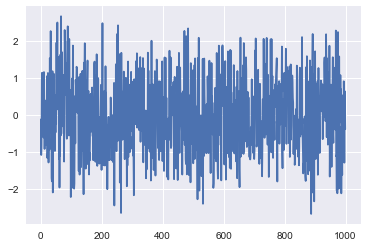

In [159]:
plt.plot(df1['A'])

In [160]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],
                                                    test_size=0.30)

In [161]:
from sklearn.neighbors import KNeighborsClassifier

In [162]:
knn = KNeighborsClassifier(n_neighbors=1)

In [163]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [164]:
pred = knn.predict(X_test)

In [165]:
np.mean(pred != y_test)

0.11333333333333333

In [166]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

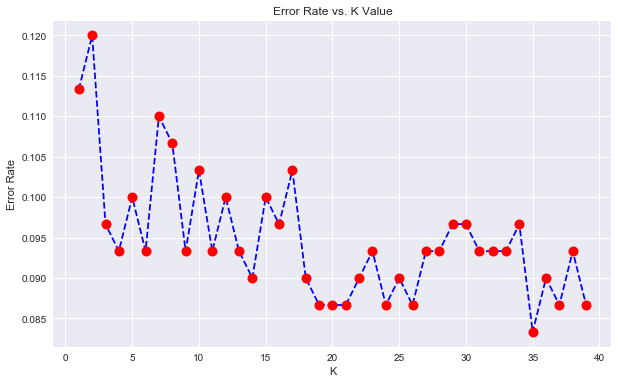

In [167]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')